In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import keras.models
import keras.layers
from keras.models import Sequential
from keras.layers import Activation, Dense

In [4]:
import numpy as np

In [6]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
dirsplit0 = "../20220408CAPSULE_DATA/splits/splitslowres/split_0/"

In [8]:
dirsplit1 = "../20220408CAPSULE_DATA/splits/splitslowres/split_1/"

In [9]:
os.listdir(dirsplit0)

['Ileo-cecal valve',
 'Foreign Bodies',
 'Pylorus',
 'Erythematous',
 'Reduced Mucosal View',
 'Blood',
 'Normal',
 'Angiectasia',
 'Lymphangiectasia',
 'Ulcer',
 'Erosion']

In [10]:
os.listdir(dirsplit1)

['Ileo-cecal valve',
 'Foreign Bodies',
 'Pylorus',
 'Erythematous',
 'Reduced Mucosal View',
 'Blood',
 'Normal',
 'Angiectasia',
 'Lymphangiectasia',
 'Ulcer',
 'Erosion']

In [11]:

def len_data(filename):
    Ileocecalvalve_data = os.listdir(filename+'/Ileo-cecal valve')
    ForeignBodies_data = os.listdir(filename+'/Foreign Bodies')
    Pylorus_data = os.listdir(filename+'/Pylorus')
    Erythematous_data = os.listdir(filename+'/Erythematous')
    Reducedmucosalview_data = os.listdir(filename+'/Reduced Mucosal View')
    Blood_data = os.listdir(filename+'/Blood')
    Normal_data = os.listdir(filename+'/Normal')
    Angiectasia_data = os.listdir(filename+'/Angiectasia')
    Lymphangiectasia_data = os.listdir(filename+'/Lymphangiectasia')
    Ulcer_data = os.listdir(filename+'/Ulcer')
    Erosion_data = os.listdir(filename+'/Erosion')
        
    value = []
    for data in [Ileocecalvalve_data,ForeignBodies_data,Pylorus_data,Erythematous_data,Reducedmucosalview_data,Blood_data,Normal_data,Angiectasia_data,Lymphangiectasia_data,Ulcer_data,Erosion_data]:
        value.append(len(data))
        
    return sum(value)


In [12]:
filename = dirsplit0
print('Total Images in Training set : ' + str(len_data(filename)))

Total Images in Training set : 23061


In [13]:
filename = dirsplit1
print('Total Images in Testing set : ' + str(len_data(filename)))

Total Images in Testing set : 24101


In [14]:
def plot_data(filename):
    Ileocecalvalve_data = os.listdir(filename+'/Ileo-cecal valve')
    ForeignBodies_data = os.listdir(filename+'/Foreign Bodies')
    Pylorus_data = os.listdir(filename+'/Pylorus')
    Erythematous_data = os.listdir(filename+'/Erythematous')
    Reducedmucosalview_data = os.listdir(filename+'/Reduced Mucosal View')
    Blood_data = os.listdir(filename+'/Blood')
    Normal_data = os.listdir(filename+'/Normal')
    Angiectasia_data = os.listdir(filename+'/Angiectasia')
    Lymphangiectasia_data = os.listdir(filename+'/Lymphangiectasia')
    Ulcer_data = os.listdir(filename+'/Ulcer')
    Erosion_data = os.listdir(filename+'/Erosion')
        
    value = []
    for data in [Ileocecalvalve_data,ForeignBodies_data,Pylorus_data,Erythematous_data,Reducedmucosalview_data,Blood_data,Normal_data,Angiectasia_data,Lymphangiectasia_data,Ulcer_data,Erosion_data]:
        value.append(len(data))
    
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.barplot(['Ileoc','FBodies','Pylorus','Erythema','Reduced','Blood','Normal','Angiec','Lymphangie','Ulcer','Erosion'],value, palette = 'plasma')
    plt.title(filename.split('/')[1])



/home/javier/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


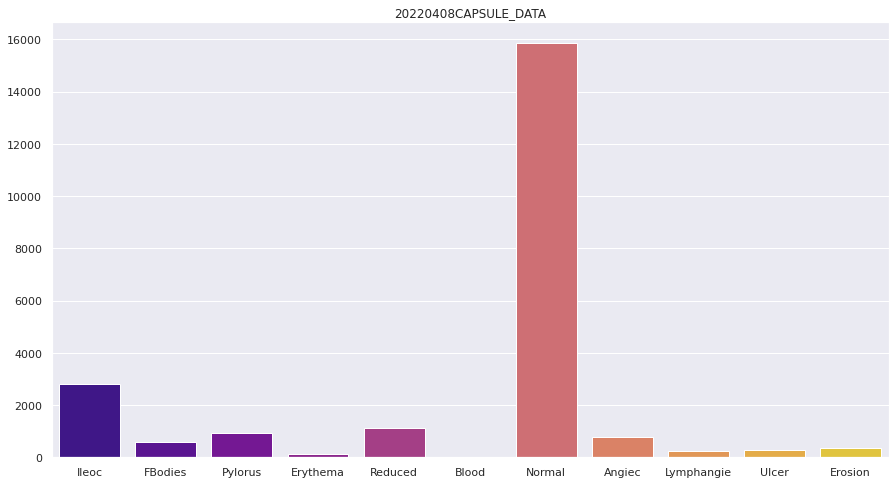

In [15]:
filename = dirsplit0
plot_data(filename)

/home/javier/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


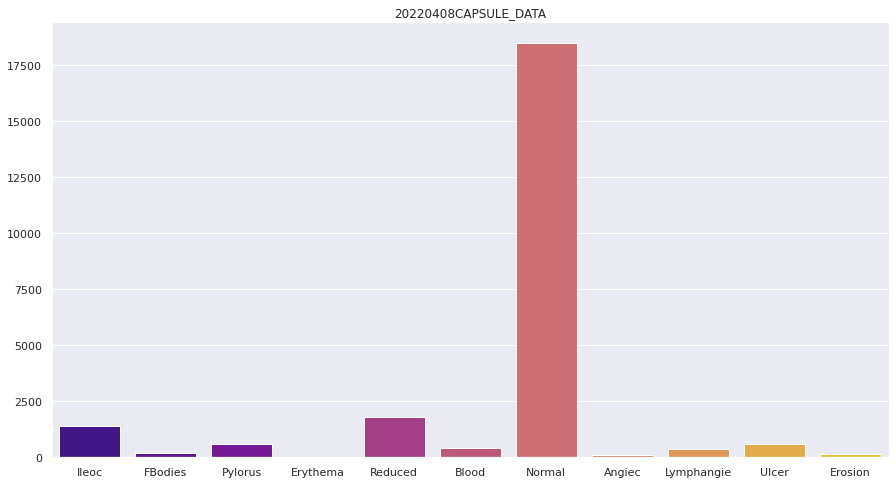

In [16]:
filename = dirsplit1
plot_data(filename)

In [33]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def MCC(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    numerator = (tp * tn - fp * fn)
    denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    return numerator / (denominator + K.epsilon())


In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

In [18]:
TRAINING_DIR = dirsplit0
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    class_mode='categorical',
                                                    target_size=(168, 168))

Found 23061 images belonging to 11 classes.


In [ ]:
train_generator

In [19]:
# No need to augment validation set
validation_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
VALIDATION_DIR = dirsplit1
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              class_mode='categorical',
                                                              target_size=(168, 168))

Found 24100 images belonging to 11 classes.


## 2) ResNet152

In [29]:
#from tensorflow.keras.applications.resnet50 import ResNet50

In [21]:
from tensorflow.keras.applications.resnet import ResNet152

In [22]:
pre_trained_model = ResNet152(input_shape=(168,168,3),include_top =False, weights= 'imagenet')

2022-04-28 19:59:49.772817: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-28 19:59:49.773089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-28 19:59:49.773324: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-28 19:59:50.911329: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-28 19:59:50.911603: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

In [23]:
for layer in pre_trained_model.layers:  
    layer.trainable=False

In [24]:
last_layer = pre_trained_model.get_layer('conv4_block6_out')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 11, 11, 1024)


In [25]:
for layer in pre_trained_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f0c3fd70850> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f0c3f856e50> False
<keras.layers.convolutional.Conv2D object at 0x7f0c3f80b220> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f0c3f80b1f0> False
<keras.layers.core.activation.Activation object at 0x7f0c3f7803a0> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f0c3f561460> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0c3f571d00> False
<keras.layers.convolutional.Conv2D object at 0x7f0c3f574310> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f0c3f5742b0> False
<keras.layers.core.activation.Activation object at 0x7f0c3f50c070> False
<keras.layers.convolutional.Conv2D object at 0x7f0c3f511970> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f0c3f511760> False
<keras.layers.core.activation.Activation object at 0x7f0c3f51e0a0> False

In [34]:
x = keras.layers.Flatten()(last_output)

x = keras.layers.Dropout(0.4)(x)      

x = keras.layers.Dense(256, activation='relu')(x)

x = keras.layers.Dropout(0.2)(x)                  

x = keras.layers.Dense(11, activation='softmax')(x)           

model = keras.Model(pre_trained_model.input, x) 

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics=['acc',f1_m,precision_m, recall_m, MCC])


In [31]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 168, 168, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 174, 174, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 84, 84, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 84, 84, 64)   256         ['conv1_conv[0][0]']       

 conv2_block3_2_conv (Conv2D)   (None, 42, 42, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 42, 42, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 42, 42, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 42, 42, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 21, 21, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 21, 21, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 21, 21, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 21, 21, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv3_block6_2_relu (Activatio  (None, 21, 21, 128)  0          ['conv3_block6_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_3_conv (Conv2D)   (None, 21, 21, 512)  66048       ['conv3_block6_2_relu[0][0]']    
                                                                                                  
 conv3_block6_3_bn (BatchNormal  (None, 21, 21, 512)  2048       ['conv3_block6_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block6_add (Add)         (None, 21, 21, 512)  0           ['conv3_block5_out[0][0]',       
                                                                  'conv3_block6_3_bn[0][0]']      
          

                                                                                                  
 conv4_block1_3_conv (Conv2D)   (None, 11, 11, 1024  263168      ['conv4_block1_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block1_0_bn (BatchNormal  (None, 11, 11, 1024  4096       ['conv4_block1_0_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block1_3_bn (BatchNormal  (None, 11, 11, 1024  4096       ['conv4_block1_3_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_blo

 ization)                                                                                         
                                                                                                  
 conv4_block4_2_relu (Activatio  (None, 11, 11, 256)  0          ['conv4_block4_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block4_3_conv (Conv2D)   (None, 11, 11, 1024  263168      ['conv4_block4_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block4_3_bn (BatchNormal  (None, 11, 11, 1024  4096       ['conv4_block4_3_conv[0][0]']    
 ization)                       )                                                                 
          

Total params: 41,441,163
Trainable params: 31,722,507
Non-trainable params: 9,718,656
__________________________________________________________________________________________________


In [35]:
history_resnet = model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

/tmp/ipykernel_1932/2658740047.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_resnet = model.fit_generator(train_generator,


Epoch 1/5
721/721 [==============================] - 296s 406ms/step - loss: 4.5225 - acc: 0.6673 - f1_m: 0.5204 - precision_m: 0.6222 - recall_m: 0.4623 - MCC: 0.4991 - val_loss: 1.2065 - val_acc: 0.7670 - val_f1_m: 0.7650 - val_precision_m: 0.7669 - val_recall_m: 0.7631 - val_MCC: 0.7416
Epoch 2/5
721/721 [==============================] - 293s 406ms/step - loss: 1.3434 - acc: 0.6874 - f1_m: 0.5978 - precision_m: 0.6884 - recall_m: 0.5343 - MCC: 0.5706 - val_loss: 1.1471 - val_acc: 0.7670 - val_f1_m: 0.7437 - val_precision_m: 0.7682 - val_recall_m: 0.7216 - val_MCC: 0.7197
Epoch 3/5
721/721 [==============================] - 292s 404ms/step - loss: 1.2787 - acc: 0.6874 - f1_m: 0.6048 - precision_m: 0.6906 - recall_m: 0.5411 - MCC: 0.5768 - val_loss: 1.1293 - val_acc: 0.7670 - val_f1_m: 0.7666 - val_precision_m: 0.7667 - val_recall_m: 0.7666 - val_MCC: 0.7433
Epoch 4/5
721/721 [==============================] - 294s 408ms/step - loss: 1.2403 - acc: 0.6874 - f1_m: 0.6058 - precision_m:

In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall, MCC = model.evaluate(train_generator, verbose=0)

In [43]:
# evaluate the model
results = model.evaluate(train_generator, verbose=0)

In [44]:
print (results)

[1.2415313720703125, 0.6874376535415649, 0.687404990196228, 0.6874050498008728, 0.6874050498008728, 0.6561456918716431]


In [ ]:
# loss, acc, f1, precision, recall, MCC

In [38]:
acc = history_resnet.history['acc']
val_acc = history_resnet.history['val_acc']   
loss = history_resnet.history['loss']
val_loss = history_resnet.history['val_loss']
epochs = history_resnet.epoch

Text(0, 0.5, 'Accuracy')

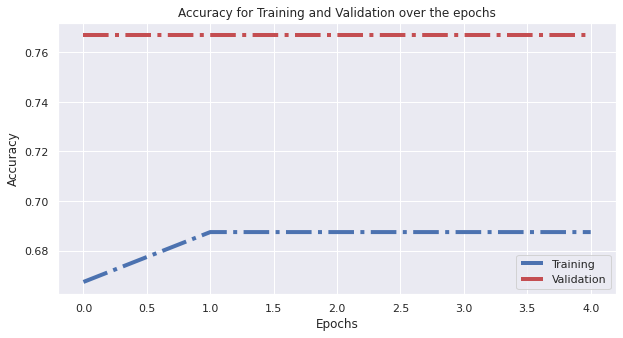

In [39]:
plt.figure(figsize=(10,5),frameon=False)
plt.plot(epochs,acc,c='b',ls='-.',lw='4',label='Training')
plt.plot(epochs,val_acc,c='r',ls='-.',lw='4',label='Validation')
plt.legend()
plt.title('Accuracy for Training and Validation over the epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

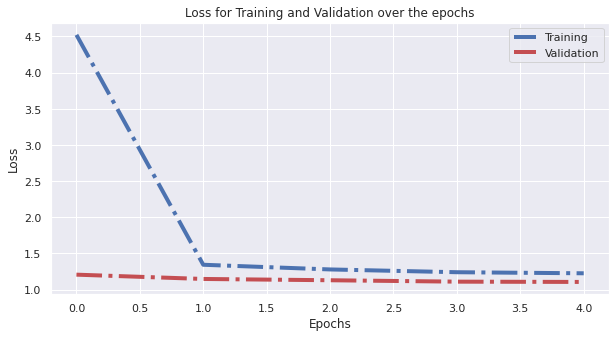

In [40]:
plt.figure(figsize=(10,5))
plt.plot(epochs,loss,c='b',ls='-.',lw='4',label='Training')
plt.plot(epochs,val_loss,c='r',ls='-.',lw='4',label='Validation')
plt.legend()
plt.title('Loss for Training and Validation over the epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

We will use the **InceptionV3** model as it gave the best results(**85%**)

In [ ]:
history_inception.model.save('Final Model.h5')

In [ ]:
import cv2

model_pred = tf.keras.models.load_model('Final Model.h5')